# Australian Business Cycles Case Study

by [MachinaFantasma](https://github.com/phantomachine/ECON8026-public) | [Twitter](https://twitter.com/machinafantasma)

This little note gets you to 

1. Practice your chops using some Python and Jupyter (``Pandas`` for data analysis, ``NumPy`` for numerical work, ``Matplotlib`` for plotting) 

2. Appreciate some Australian Business Cycle empirical regularities (variables as defined through a Keynesian lens)

Data visualization and statistics:

* Uses custom defined plotting method (see ``scatmeister`` below)

* Considers same correlation exercise over rolling samples

## Part 0: Setup

Let's make a copy of the public repository of files used in this course (including the data Excel file for today). This uses the `git clone` command:

In [1]:
!git clone https://github.com/phantomachine/ECON8026-public.git

Cloning into 'ECON8026-public'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


(You could also have manually downloaded the data file from https://github.com/phantomachine/ECON8026-public and imported it using the next step below.)

In [2]:
# Import libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Notebook magic to plot inline
%matplotlib inline

Let's extract the data we need.

In [3]:
# Change directory to check directory content (we want data_pandas.xlsx)
!cd ECON8026-public/ && ls -la

total 0
drwxr-xr-x 2 nbuser nbuser     0 Mar 13  2018 .
drwxr-xr-x 2 nbuser nbuser     0 Jan  1  1970 ..
-rw-r--r-- 1 nbuser nbuser 19646 Mar 13  2018 data_pandas.xlsx
-rw-r--r-- 1 nbuser nbuser 26112 Mar 13  2018 demo_money.xls
drwxr-xr-x 2 nbuser nbuser     0 Mar 13  2018 .git
-rw-r--r-- 1 nbuser nbuser   180 Mar 13  2018 README.md


In [4]:
# Read XLSX data into current memory
abcdata = pandas.read_excel('ECON8026-public/data_pandas.xlsx')

# Show
abcdata

,CPI,GDP,Unemployment Rate,Potential Output,Natural Unemployment Rate,Output Gap,Cyclical Unemployment,CPI Inflation Rate
1978-06-01,21.7,126118,6.295557,127432.677037,5.940464,-0.010370,0.355094,0.018605
1978-09-01,22.1,128077,6.340401,128377.299543,5.997906,-0.002342,0.342495,0.018265
1978-12-01,22.6,129122,6.243410,129319.365142,6.056370,-0.001527,0.187040,0.022372
1979-03-01,23.0,132635,6.354905,130256.996857,6.116693,0.018092,0.238213,0.017544
1979-06-01,23.6,130506,6.371574,131188.194358,6.179827,-0.005214,0.191748,0.025752
1979-09-01,24.2,131781,6.218432,132112.443566,6.246874,-0.002512,-0.028442,0.025106
1979-12-01,24.9,134307,6.247032,133028.804032,6.319057,0.009563,-0.072025,0.028515
1980-03-01,25.4,134898,6.103704,133936.128152,6.397579,0.007156,-0.293875,0.019881
1980-06-01,26.2,135231,6.130805,134834.067198,6.483599,0.002940,-0.352794,0.031010
1980-09-01,26.6,136029,6.202775,135722.873610,6.578092,0.002253,-0.375317,0.015152


## Part 1: Scatter plots

Below we see if there is some sort of statistical association between `Output Gap` and `CPI Inflation Rate`. Formally, for two sample series $X := \{x_1, ..., x_T \}$ and $Y := \{ y_1, ..., y_T \}$, the correlation statistic is defined as:

$
    \text{corr}({X, Y}) = \frac{ \text{cov} (X, Y) }{ \text{std}(X) \text{std}(Y) }.
$

The numerator measures the direction and magnitude of the co-variation of these two, and the denominator renders the ratio to be a measure that has information about the normalized *magnitude* and *direction* of their statistical association. Observe that the range of the correlation statistic, $\text{corr}({X, Y})$, is $[-1,1]$.

In [5]:
# Pre-define a function for plotting 2-D scatter plots, OLS regression
def scatmeister(xkey, ykey, df, color="purple",symbol="o",linestyle="-m"):
    x = df[xkey]                                     # Get data series from DataFrame based on keynames
    y = df[ykey]
    plt.figure()                                          # Set figure
    slope, const = np.polyfit(x, y, deg=1)                # OLS fit
    plt.scatter(x, y, c=color, marker=symbol, alpha=0.5)  # render scatter plots
    plt.plot(x, const+slope*x, linestyle)                 # render OLS model
    plt.xlabel(xkey)
    plt.ylabel(ykey)
    plt.show()

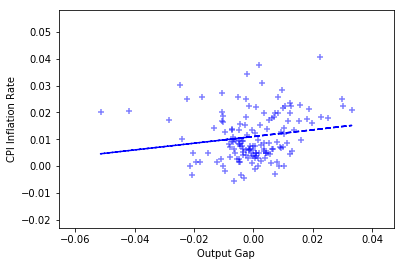

In [6]:
# Define current x-axis and y-axis variables
scatmeister('Output Gap', 'CPI Inflation Rate', abcdata, "b", "+", "--b")

Now we do the same for `Output Gap` and `Cyclical Unemployment`:

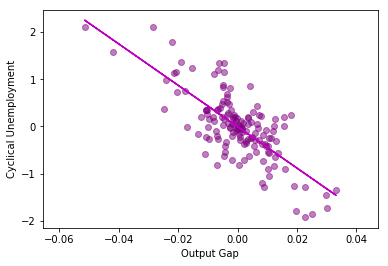

In [7]:
scatmeister('Output Gap', 'Cyclical Unemployment', abcdata)

## Parts 2 - 4

We see that `Output Gap` and `CPI Inflation Rate` are positively correlated. That is, the latter is *procyclical*. Also we see that `Cyclical Unemployment` is *countercyclical*. Without plotting, you should be able to deduce that `CPI Inflation` and `Cyclical Unemployment` are negatively correlated. (Why?)

## Part 5

Sure enough, we can see that:

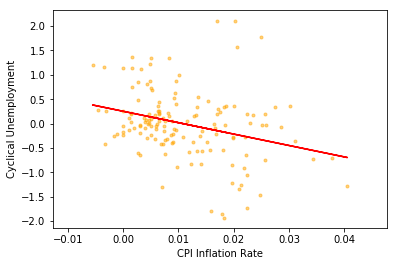

In [14]:
scatmeister('CPI Inflation Rate','Cyclical Unemployment', abcdata, "orange", ".", "-r")

**N.B.** Early Keynesian economists have taken the last figure to be evidence of an exploitable monetary-policy trade-off, and it has been labelled the Phillips Curve. 

We will re-visit this strong claim later and ask: Is this relation really that stable as an empirical regularity? Can policy treat it as a primitive, immutable and therefore policy-exploitable trade-off? That is, is it really WYSIWYG?

## Part 6

FALSE, of course! Correlation does not imply causation. That is why we still need more structure - models to help us conjecture how causality runs in the data. The models should at least produce observable correlations that match the empirical correlations though!

## Part 7

Let's redo the above exercise using CPI Price Level acceleration (i.e., growth rate of inflation rate) instead.

In [9]:
# Trim off first data observation (see next line)
abcdata_alt = abcdata[['Output Gap', 'Cyclical Unemployment']][1::]

# First-difference CPI Inflation Rate to get the inflation rate of the inflation rate (lose 1 obs)
CPI_acc = ( abcdata['CPI Inflation Rate'].diff() )[1::]

# print(abcdata['CPI Inflation Rate'].diff())

# Include new CPI acceleration data
abcdata_alt['CPI Acceleration'] = CPI_acc

# Show
# abcdata_alt

In [10]:
# Display variable KEY names
abcdata_alt.keys()

Index(['Output Gap', 'Cyclical Unemployment', 'CPI Acceleration'], dtype='object')

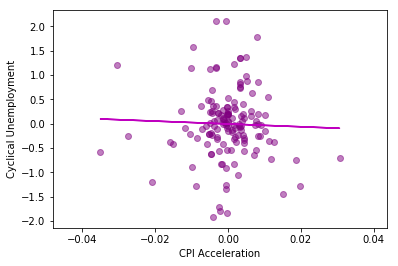

In [11]:
# Plot scattergram
scatmeister('CPI Acceleration', 'Cyclical Unemployment', abcdata_alt)

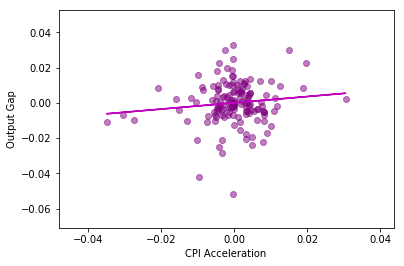

In [12]:
# Plot scattergram
scatmeister('CPI Acceleration', 'Output Gap', abcdata_alt)

So we see similar statistical associations between the variables as those in Chad Jones' case study for the US data.

# Extras: rolling sub-samples

This part uses video encoding that may require you to [install FFMEG](https://www.ffmpeg.org/) on your computer. The animated graphics may only work if you execute the notebook locally (i.e., not on the Microsoft Azure cloud). So you also need to be executing this notebook locally ([prior installation of Anaconda Python required](https://www.anaconda.com/distribution/)).

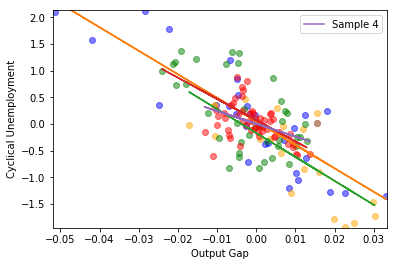

In [13]:
# Tools for animation
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# Choose your data series to analyze here
xseries = abcdata['Output Gap']
yseries = abcdata['Cyclical Unemployment']

# Define subsamples
xsample = [ xseries.loc['1978-06-01':'1985-09-01'],
            xseries.loc['1985-09-01':'1990-09-01'],
            xseries.loc['1990-12-01':'2000-09-01'],
            xseries.loc['2000-12-01':'2014-09-01'],
          ]

ysample = [ yseries.loc['1978-06-01':'1985-09-01'],
            yseries.loc['1985-09-01':'1990-09-01'],
            yseries.loc['1990-12-01':'2000-09-01'],
            yseries.loc['2000-12-01':'2014-09-01'],
          ]

tag = [ 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4']

# Custom colormap for each sample range
colormap = ["blue", "orange", "green", "red"]

# Initialize rolling window plots
x = [] 
y = []
ax.set_xlim((1.01*xseries.min(), 1.01*xseries.max()))
ax.set_ylim((1.01*yseries.min(), 1.01*yseries.max()))
plt.xlabel('Output Gap')
plt.ylabel('Cyclical Unemployment')
line, = ax.plot([], [], lw=2)

# initiate animation with empty plot
def init():
    line.set_data([], [])
    return line,

# Define callback function to animate scattergrams
def animate(i):
    slope, const = np.polyfit(xsample[i], ysample[i], deg=1)    # OLS fit
    line, = ax.plot(xsample[i], const+slope*xsample[i])         # render OLS model
    scattergram = ax.scatter(xsample[i], ysample[i], 
                             c=colormap[i], alpha = 0.5)
    ax.legend(handles=[line], labels=["{}".format(tag[i])])
# Invoke function animation
ani = animation.FuncAnimation(fig, animate, init_func=init,
                frames=4, interval=1500, repeat=True) 
# Render as video
HTML(ani.to_html5_video())